## Taxonomic occurrence data from OBIS

## installing & importing modules

In [1]:
try:
  import pyobis
except:
  %pip -q install pyobis
  import pyobis

try:
  import geoplot
except:
  %pip -q install geoplot
  import geoplot

try:
  import geopandas as gpd
except:
  %pip -q install geopandas
  import geopandas as gpd

try:
  import geodatasets
except:
  %pip -q install geodatasets
  import geodatasets


from google.colab import drive
drive.mount('/content/drive')

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## grabbing the data

Since our analysis will be highly dependent on the depth parameter, we will choose only non NaN values.

In [2]:

from pyobis import occurrences
import pandas as pd
import pickle
import os


# define depth range
STARTDEPTH = 0
ENDDEPTH = 30
CACHE = True

# if occurrences file exists
if os.path.exists("content/drive/MyDrive/occurrences.pkl") and CACHE:
    print('loading cached data from gdrive...')
    with open('/content/drive/MyDrive/occurrences.pkl', 'rb') as f:
        data = pickle.load(f)
else:
    # create empty df
    df = pd.DataFrame()
    # for taxa in seagrasses EOV aphiaID list
    # ref: https://github.com/ioos/marine_life_data_network/blob/main/eov_taxonomy/IdentifierList.csv
    seagrasses_ids = [143769, 143770, 143751, 143768, 234030]
    for taxa_id in seagrasses_ids:
        query = occurrences.search(taxonid=taxa_id, startdepth=STARTDEPTH, enddepth=ENDDEPTH)
        df_taxa = query.execute()

        # select only the columns we need
        df_taxa = df_taxa[["decimalLatitude", "decimalLongitude", "occurrenceStatus", "year", "date_mid"]]

        df = pd.concat([df, df_taxa], ignore_index=True)


    # save df
    # df.to_csv("content/drive/occurrences.csv", index=False)
    with open('/content/drive/MyDrive/occurrences.pkl', 'wb') as f:
        pickle.dump(df, f)

print(df.head())



   decimalLatitude  decimalLongitude occurrenceStatus  year      date_mid
0       -32.095973        115.700258          present   NaN  9.308736e+11
1       -32.076297        115.744402          present   NaN  9.308736e+11
2        43.273867          5.351050          present  2008  1.209427e+12
3       -32.133319        115.729781          present   NaN  9.308736e+11
4       -34.057323        151.136528          present   NaN  1.183334e+12


## visualization

### 1. year-wise distribution
Let us see the year-wise distribution of records.

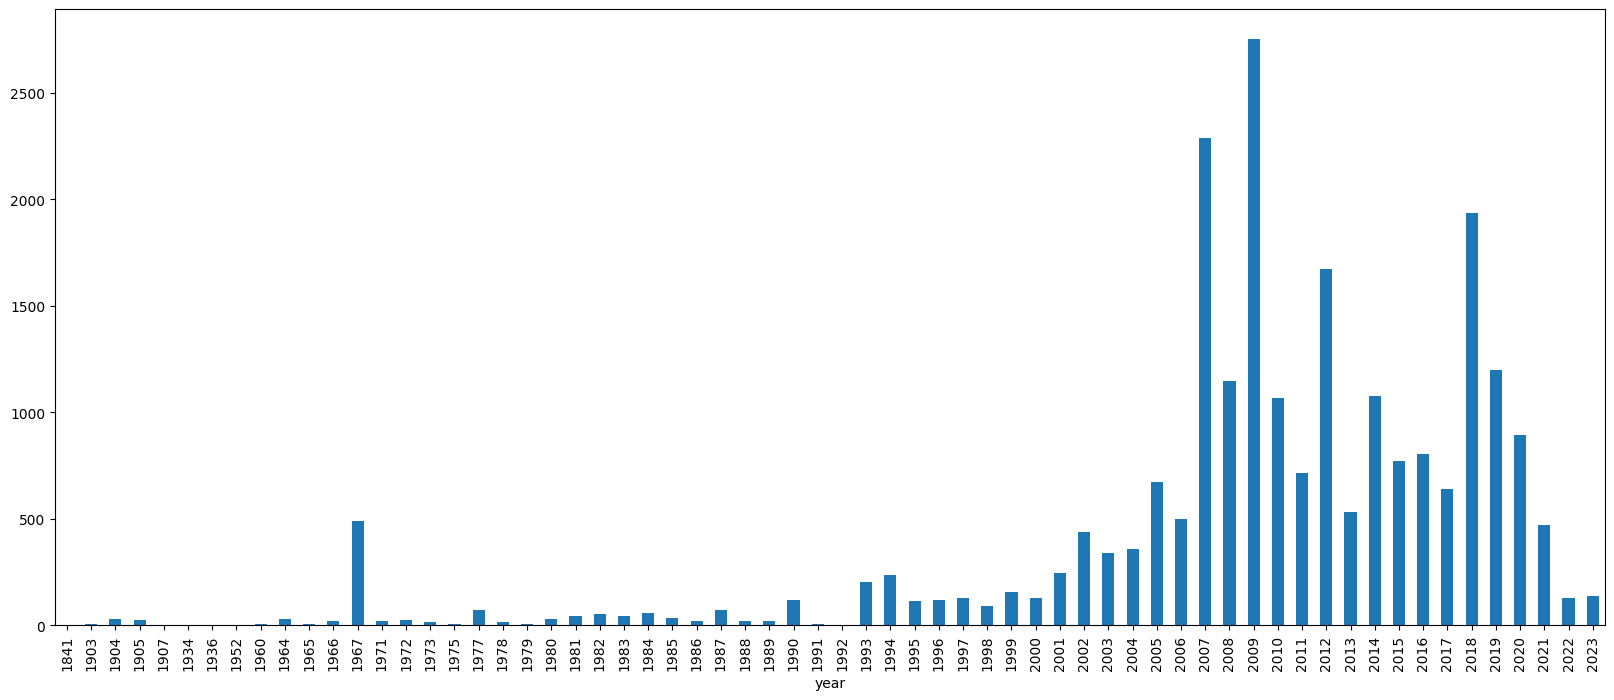

In [3]:
with open('/content/drive/MyDrive/occurrences.pkl', 'rb') as f:
    df = pickle.load(f)

ax = df.groupby("year").date_mid.count().plot.bar(figsize = (20,8))

Patterns in the number of records through time are more likely due to sampling bias than changes in taxa population.

### with latitude and longitude stacked side-by-side

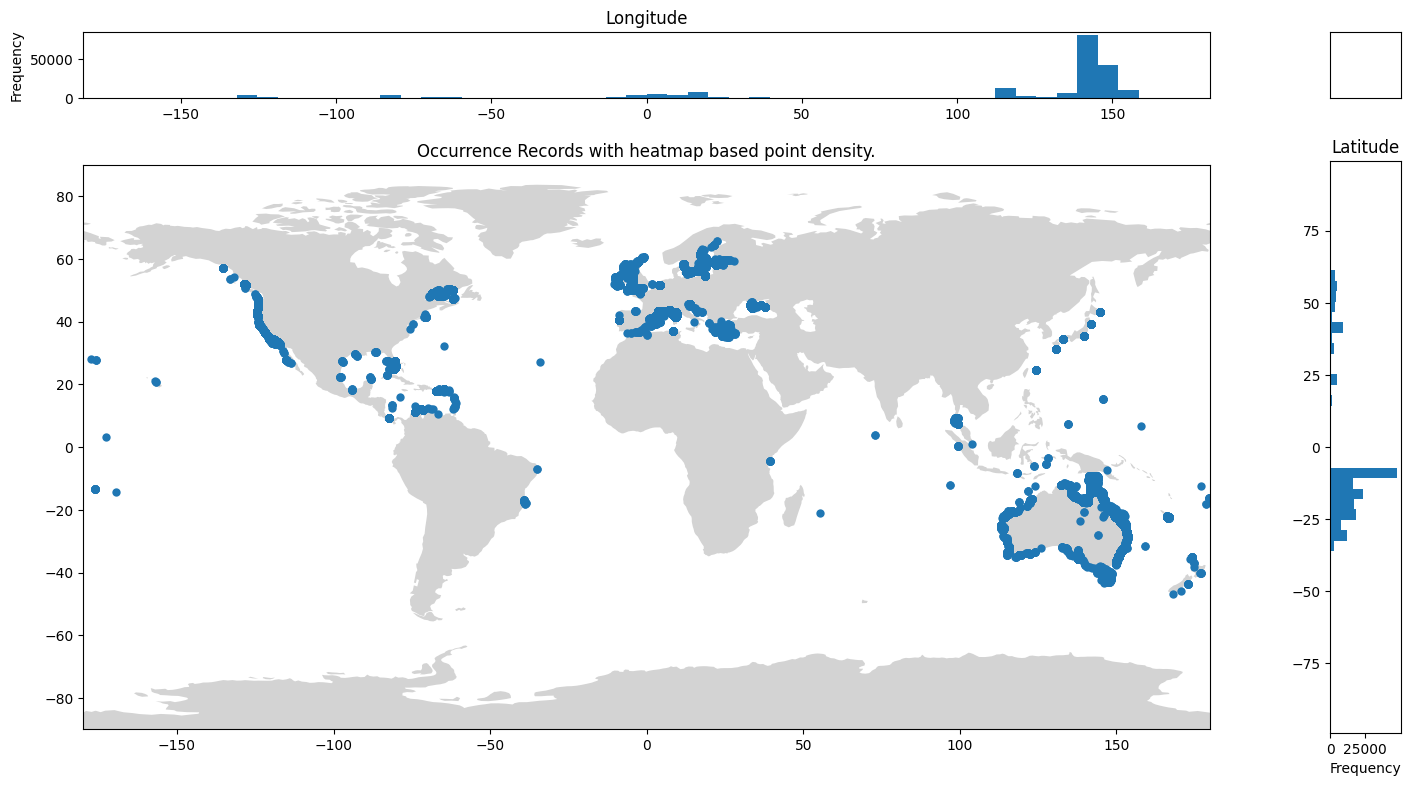

In [ ]:
import seaborn as sns
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt

df = pd.read_csv("data/occurrences.csv")

# getting the basemap
countries = gpd.read_file(geodatasets.get_path("naturalearth.land"))


f, axes = plt.subplots(
    2,
    2,
    figsize=(17,9.1),
    gridspec_kw={'width_ratios': [16, 1], 'height_ratios': [1, 8.7]}
)
df["decimalLongitude"].astype(int).plot.hist(
    ax=axes[0][0],
    bins=50,
    range=(-165, 165)  # manually adjusted (from 180) to better align with map
)
axes[0][0].set_title("Longitude")

axes[0][1].set_facecolor('white')
axes[0][1].tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)

countries.plot(color="lightgrey", figsize=(16, 8.4), ax = axes[1][0])
sns.scatterplot(
    data=df,
    x="decimalLongitude",
    y="decimalLatitude",
    linewidth=0,
    ax=axes[1][0]
)

axes[1][0].set_xlim(-180,180)
axes[1][0].set_ylim(-90, 90)
axes[1][0].set_title("Occurrence Records with heatmap based point density.")
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")
df["decimalLatitude"].astype(int).plot.hist(
    orientation='horizontal',
    ax=axes[1][1],
    bins=50,
    range=(-80, 80)
)

axes[1][1].set_title("Latitude")
plt.show()

--------------------
--------------------